# Libraries

In [1]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import os as os
import pandas as pd
import seaborn as sns

import random
random.seed(0) # pick your seed

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest

# Data

In [2]:
drive.mount('/content/gdrive', force_remount=True)
dir = os.path.join('gdrive', 'My Drive', 'Eurostat', '02 - Data Science for Structured Data')
data_dir = os.path.join(dir, 'data')

Mounted at /content/gdrive


In [3]:
df_iris = pd.read_csv(os.path.join(data_dir, 'iris.csv'),
                      header=None,
                      names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df_iris.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,class
124,6.7,3.3,5.7,2.1,Iris-virginica
66,5.6,3.0,4.5,1.5,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
df_pima = pd.read_csv(os.path.join(data_dir, 'pima.csv'),
                      header=8,
                      names = ['preg', 'gluc', 'pres', 'skin' ,'insu', 'bmi', 'pedi', 'age', 'class'])
df_pima.sample(3)

,preg,gluc,pres,skin,insu,bmi,pedi,age,class
431,3,89,74,16,85,30.4,0.551,38,0
623,0,94,70,27,115,43.5,0.347,21,0
273,1,71,78,50,45,33.2,0.422,21,0


In [5]:
df_wine = pd.read_csv(os.path.join(data_dir, 'wine.csv'), 
                      sep=';')
df_wine.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
226,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6
1540,6.2,0.52,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.6,6
528,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,6


In [6]:
df_housing = pd.read_csv(os.path.join(data_dir, 'housing.csv'))
df_housing.sample(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
392,11.57790,0.0,18.1,0,0.700,5.036,97.0,1.7700,24,666,20.2,396.90,25.68,9.7
366,3.69695,0.0,18.1,0,0.718,4.963,91.4,1.7523,24,666,20.2,316.03,14.00,21.9
379,17.86670,0.0,18.1,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2


In [7]:
df_happiness = pd.read_csv(os.path.join(data_dir, 'happiness.csv'))
df_happiness.sample(3)

,isced11,sex,age,geo,time,ACCSAT,COMSAT,FINSAT,GREENSAT,JOBSAT,LIFESAT,LIVENVSAT,MEANLIFE,RELSAT,TIMESAT
1802,ED5-8,M,Y25-34,DK,2013,7.6,7.9,7.1,7.5,8.1,7.8,7.9,7.7,7.7,6.5
618,ED0-2,M,Y50-64,SE,2013,8.3,8.3,7.1,8.8,8.2,7.9,7.1,7.7,8.4,7.6
23,ED0-2,F,Y16-24,FI,2018,NaN,NaN,7.8,NaN,NaN,8.2,NaN,NaN,8.6,7.8


# Spot-Check Classification Algorithms
- Establish short-list of algorithms that work well on your problem
- Later: Tune those algorithms

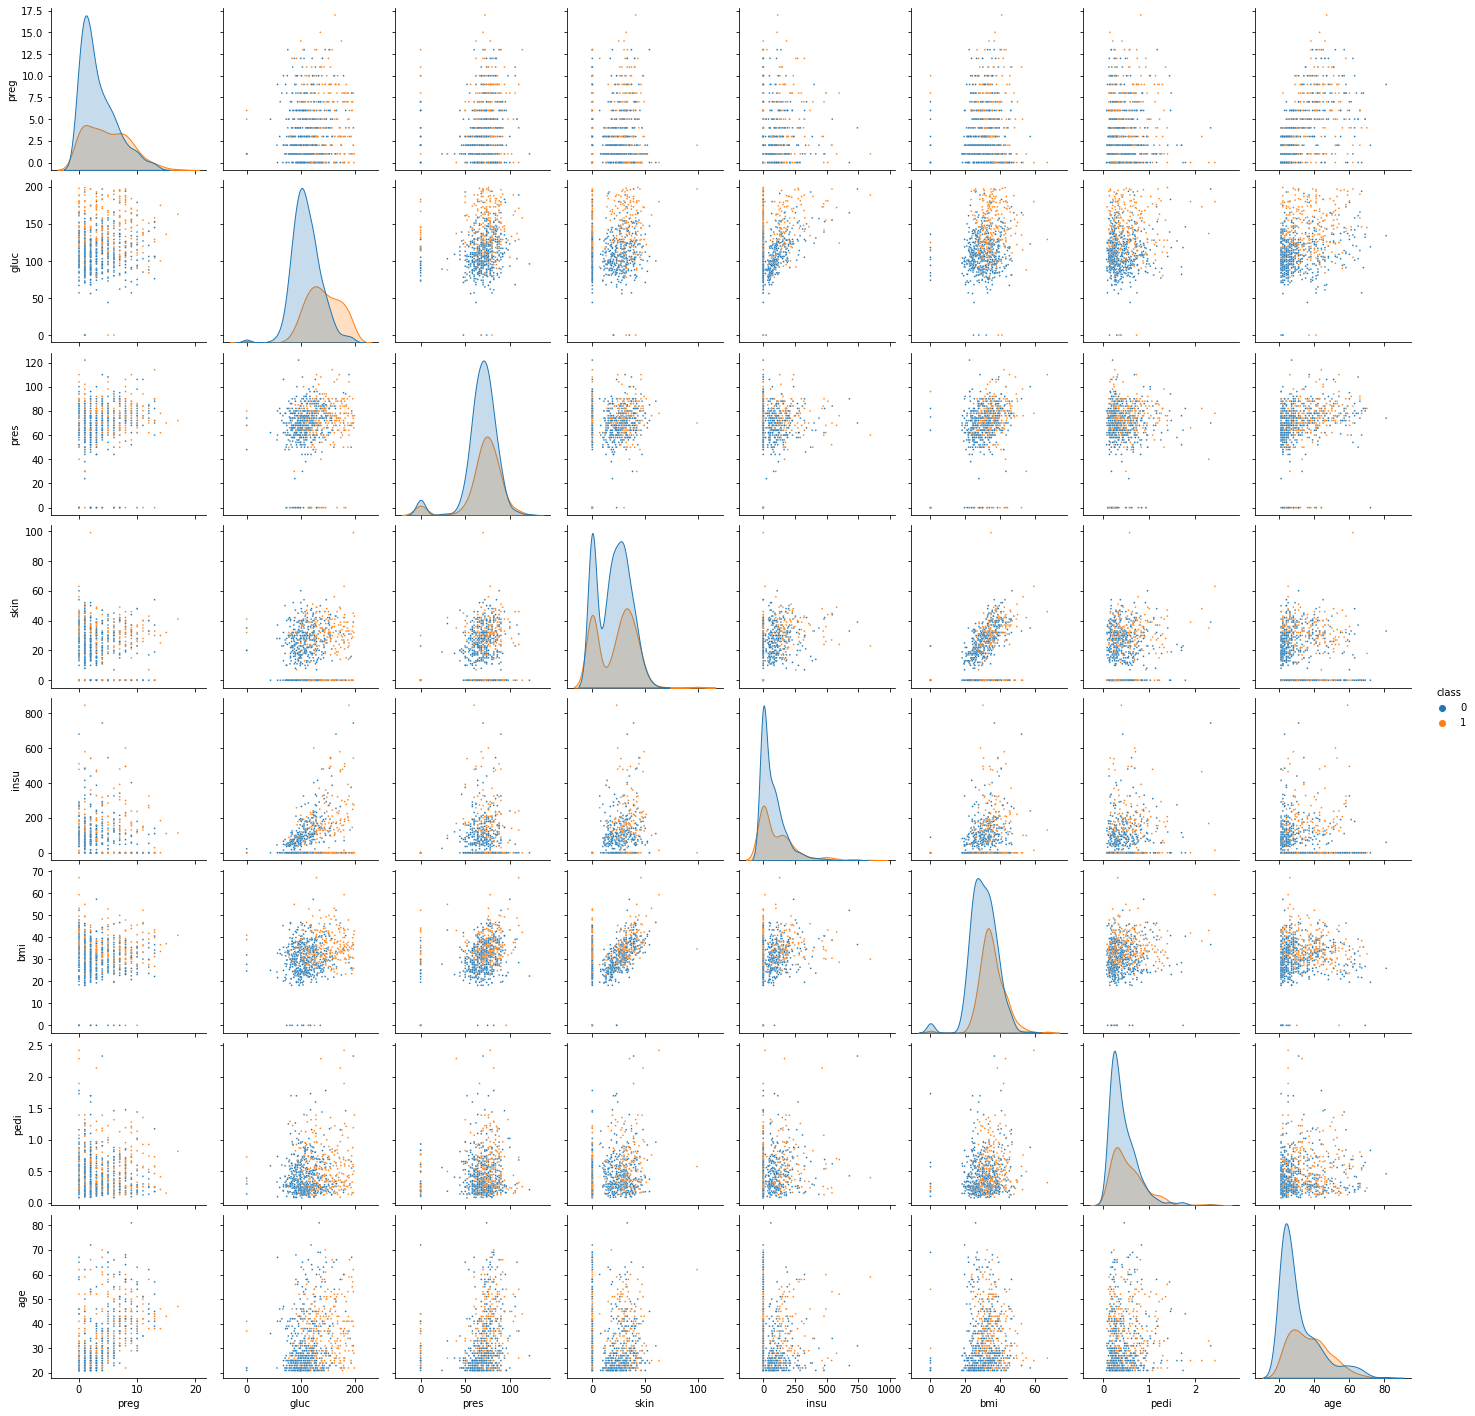

In [8]:
sns.pairplot(data=df_pima,
             hue='class',
             plot_kws={"s": 3})

## Linear Classification Algorithms

### Logistic Regression
- assumes (theoretically) a Gaussian distribution for the numeric input variables
- can model binary (and multiclass) classification problems
- [Understand it](https://en.wikipedia.org/wiki/Logistic_regression)
- [Use it](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

⚡ The following model leaks data!
- Can you see why?
- We'll fix that later

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df_pima.copy()
y = X.pop('class')

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = LogisticRegression(max_iter=1000)

results = cross_val_score(model, rescaledX, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

77.21% (1.88%)


### Linear Discriminant Analysis
- Statistical technique for binary and multiclass classification.
- Assumes a Gaussian distribution for the numerical input variables.
- [Understand it](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)
- [Use it](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = LinearDiscriminantAnalysis()

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

76.82% (2.01%)


## Non-Linear Classification Methods

### k-Nearest Neighbors (KNN)
- uses a distance metric to find the _k_ most similar
instances in the training data for a new instance.
- takes the mean outcome of the neighbors as the prediction.
- [Understand it](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
- [Use it](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = KNeighborsClassifier(n_neighbors=5)

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

71.61% (2.78%)


### Naive Bayes
- calculates the probability of each class and the conditional probability of each class given each input value. 
- assuming that the probabilities are all independent (a simple or naive assumption)
- When working with real-valued data, a Gaussian distribution is assumed to easily estimate the probabilities for input variables using the Gaussian Probability Density Function.
- [How it works](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)
- [How to use it](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB)

In [12]:
from sklearn.naive_bayes import GaussianNB

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = GaussianNB()

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

74.99% (3.25%)


### Classification and Regression Trees (CART)
- CART (or just decision trees) construct a binary tree from the training data.
- Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training data in order to minimize a cost function (like the [Gini index](https://en.wikipedia.org/wiki/Gini_coefficient)).
- [How it works](https://en.wikipedia.org/wiki/Decision_tree_learning)
- [How to use it](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [13]:
from sklearn.tree import DecisionTreeClassifier

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = DecisionTreeClassifier()

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

68.87% (4.26%)


# ❓ Exercise

Pick any algorithm and improve its accuracy:
- Do some data cleaning (what about all those zeros?)
- Do some feature engineering to better expose the structure of the problem to the algorithm
- Tune some algorithm parameters

How many percent can you improve?

# Model Selection

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))

LR: 0.7773 (0.0404)
LDA: 0.7734 (0.0364)
KNN: 0.7057 (0.0434)
CART: 0.6994 (0.0627)
NB: 0.7525 (0.0477)
SVC: 0.7604 (0.0364)


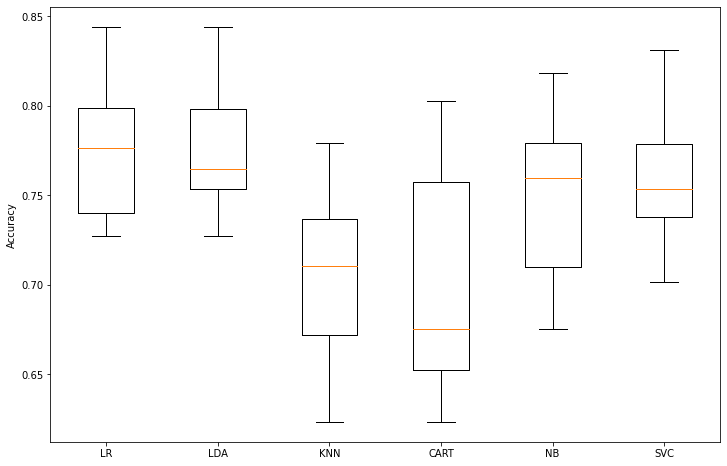

In [15]:
results = []
names = []
scoring = 'accuracy'

X = df_pima.copy()
y = X.pop('class')

for name, model in models:
	kfold = KFold(n_splits=10, shuffle=True, random_state=8)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
plt.show()

# Workflow Automation

## Pipelines

Data leakage:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df_pima.copy()
y = X.pop('class')

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

kfold = KFold(n_splits=5, shuffle=True, random_state=8)
model = LogisticRegression(max_iter=1000)

results = cross_val_score(model, rescaledX, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

77.21% (1.88%)


The pipeline stops data leakage

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)

model = Pipeline([('standardize', StandardScaler()),
                  ('lr', LogisticRegression(max_iter=1000))])

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

77.21% (1.88%)


In [18]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)

model = Pipeline([('standardize', StandardScaler()),
                  ('pca', PCA(5)),
                  ('lr', LogisticRegression(max_iter=1000))])

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

74.47% (4.06%)


## ColumnTransformer

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)

ct = ColumnTransformer([("standardize", StandardScaler(), [0, 4]),
                        ("normalizer", Normalizer(), [1, 2, 3])],
                       remainder='passthrough')

model = Pipeline([('transformers', ct),
                  ('lr', LogisticRegression(max_iter=1000))])

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


71.48% (3.17%)


In [20]:
pd.DataFrame(ct.fit_transform(X))

,0,1,2,3,4,5,6,7
0,0.639947,-0.692891,0.879567,0.427897,0.208006,33.6,0.627,50.0
1,-0.844885,-0.692891,0.762646,0.592172,0.260197,26.6,0.351,31.0
2,1.233880,-0.692891,0.943939,0.330121,0.000000,23.3,0.672,32.0
3,-0.844885,0.123302,0.786472,0.583226,0.203246,28.1,0.167,21.0
4,-1.141852,0.765836,0.932296,0.272203,0.238178,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,1.827813,0.870031,0.747001,0.562100,0.355011,32.9,0.171,63.0
764,-0.547919,-0.692891,0.851815,0.488746,0.188516,36.8,0.340,27.0
765,0.342981,0.279594,0.848126,0.504670,0.161214,26.2,0.245,30.0
766,-0.844885,-0.692891,0.902861,0.429934,0.000000,30.1,0.349,47.0


## Feature Union

In [21]:
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)

features = FeatureUnion([('pca', PCA(n_components=3)),
                         ('select_best', SelectKBest(k=4))])

model = Pipeline([('feature_union', features),
                  ('standardize', StandardScaler()),
                  ('lr', LogisticRegression(max_iter=1000))])

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

77.34% (1.48%)


## Custom Transformers

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class CountTransformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass

  def fit(self, X, y = None):
    self._medians = np.nanmedian(X, axis=0)
    return self

  def transform(self, X, y = None):
    _X = X.copy()
    counts = []
    for _, x in _X.iterrows():
      counts.append(np.sum([xi > mi for xi, mi in zip(x.values, self._medians)]))
    _X['counts'] = counts
    return _X

In [23]:
X = df_pima.copy()
y = X.pop('class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=8)

ct = CountTransformer()
ct.fit(X_train, y_train)
ct.transform(X_test)

,preg,gluc,pres,skin,insu,bmi,pedi,age,counts
302,5,77,82,41,42,35.8,0.156,35,6
131,9,122,56,0,0,33.3,1.114,33,5
124,0,113,76,0,0,33.3,0.278,23,2
486,1,139,62,41,480,40.7,0.536,21,5
306,10,161,68,23,132,25.5,0.326,47,4
...,...,...,...,...,...,...,...,...,...
244,2,146,76,35,194,38.2,0.329,29,5
639,1,100,74,12,46,19.5,0.149,28,2
647,0,179,50,36,159,37.8,0.455,22,5
756,7,137,90,41,0,32.0,0.391,39,6


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df_pima.copy()
y = X.pop('class')

kfold = KFold(n_splits=5, shuffle=True, random_state=8)

model = Pipeline([('counttransformer', CountTransformer()),
                  ('lr', LogisticRegression(max_iter=1000))])

results = cross_val_score(model, X, y, cv=kfold)
print("%.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


76.82% (1.44%)


# ❓ Exercise

Remove any data leakage from your solution to the previous exericese.
Did part of the improvemet vanish?